In [137]:
from sklearn.datasets import load_digits
from numpy.random import randint
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [12]:
digits = load_digits()

(1797, 64)


<Figure size 432x288 with 0 Axes>

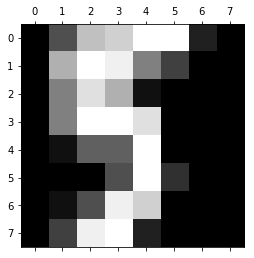

In [44]:
print(digits.data.shape)
plt.gray() 
plt.matshow(digits.images[15])

In [32]:
X, y = load_digits(return_X_y=True)

In [68]:
# standard decision tree
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeClassifier 
k = 10
tree = DecisionTreeClassifier()
score_1 = cross_val_score(tree, X, y, cv=k).mean()
print(score_1)

0.8231126630453349


In [70]:
# decision forest with number of trees = 100 
from sklearn.ensemble import BaggingClassifier 
estimator = BaggingClassifier(base_estimator=tree, n_estimators=100)
score_2 = cross_val_score(estimator, X, y, cv=k).mean()

In [73]:
# decision forest with number of trees = 100 and max_features = sqrt(n_features)
estimator = BaggingClassifier(base_estimator=tree, n_estimators=100, max_features=int(np.sqrt(X.shape[1])))
score_3 = cross_val_score(estimator, X, y, cv=k).mean()

In [110]:
# decision forest with number of trees = 100 and max_features = sqrt(n_features) and random leaf generation (random forest)
tree = DecisionTreeClassifier()
estimator = BaggingClassifier(base_estimator=tree, bootstrap_features=True, n_estimators=100, max_features=int(np.sqrt(X.shape[1])))
score_4 = cross_val_score(estimator, X, y, cv=k).mean()

Let's compare sklearn.ensemble.RandomForestClassifier with self-made RandomForest

In [113]:
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier(n_estimators=100)
score_5 = cross_val_score(estimator, X, y, cv=k).mean()

Comparsion of different hyper-parameters of random forest

In [119]:
n_trees = np.arange(5, 200, 5)

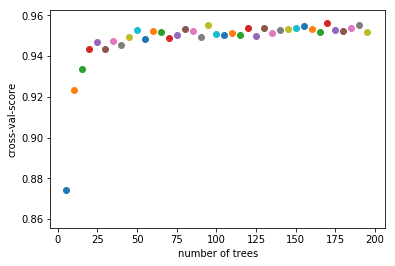

In [165]:
# number of trees comparsion
for n in n_trees:
    estimator = RandomForestClassifier(n_estimators=n)
    score = cross_val_score(estimator, X, y, cv=k).mean()
    plt.scatter(n, score)
plt.xlabel('number of trees')
plt.ylabel('cross-val-score')
plt.show()

In [128]:
n_features = np.arange(2, 64, 2)

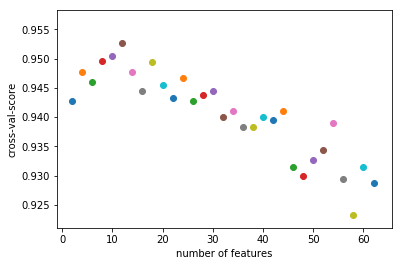

In [129]:
# number of features comparsion
for n in n_features:
    estimator = RandomForestClassifier(n_estimators=50, max_features=n)
    score = cross_val_score(estimator, X, y, cv=k).mean()
    plt.scatter(n, score)
plt.xlabel('number of features')
plt.ylabel('cross-val-score')
plt.show()

In [130]:
n_max_depths = np.arange(2, 100, 2)

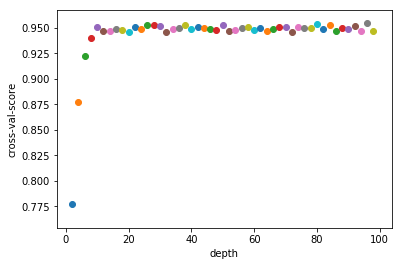

In [131]:
# max depth comparsion
for n in n_max_depths:
    estimator = RandomForestClassifier(n_estimators=50, max_features=8, max_depth=n)
    score = cross_val_score(estimator, X, y, cv=k).mean()
    plt.scatter(n, score)
plt.xlabel('depth')
plt.ylabel('cross-val-score')
plt.show()

In [156]:
# function for looking at predictions
def numb_classifier(estimator, digits):
    n = randint(0, digits.data.shape[0])
    prediction = estimator.predict(digits.data[n].reshape(1, -1))
    print('prediction:', prediction)
    plt.gray() 
    plt.matshow(digits.images[n])

In [140]:
# model to see a prediction of
estimator = RandomForestClassifier(n_estimators=50, max_features=8)
estimator.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Let's look at random number recognition

prediction: [7]


<Figure size 432x288 with 0 Axes>

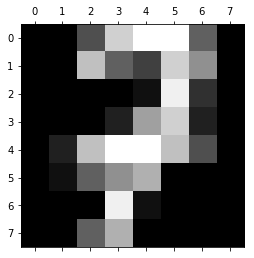

In [164]:
numb_classifier(estimator, digits)

In [167]:
print("cross-val-scores of different models:")
print(score_1, score_2, score_3, score_4, score_5)

cross-val-scores of different models:
0.8231126630453349 0.9265521154409246 0.9332632638012847 0.9315160592537521 0.9538738633195232
